# MULTICHANNEL MARKETING - FACEBOOK Ad SALES

The documenation describes the columns in the data as follows:

1.) ad_id: unique ID for each ad.

2.) xyz_campaign_id: an ID associated with each ad campaign of XYZ company.

3.) fb_campaign_id: an ID associated with how Facebook tracks each campaign.

4.) age: age of the person to whom the ad is shown.

5.) gender: gender of the person to whom the add is shown

6.) interest: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).

7.) Impressions: the number of times the ad was shown.

8.) Clicks: number of clicks on for that ad.

9.) Spent: Amount paid by company xyz to Facebook, to show that ad.

10.) Total conversion: Total number of people who enquired about the product after seeing the ad.

11.) Approved conversion: Total number of people who bought the product after seeing the ad.

In [52]:
# Importing necessary libraries

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
# Reading the csv file to the pandas dataframe

data = pd.read_csv('KAG_conversion_data.csv') 

## Statistical Data Analysis

In [54]:
# number of data points
print(data.shape)

print("\nList of attributes : " , list(data.columns))

(1143, 11)

List of attributes :  ['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender', 'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion', 'Approved_Conversion']


#### Observation :

- No. of rows : 1143
- No. of cols : 11

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


 #### Observation

- There are 9 numerical columns and 2 non-numerical columns.
- gender and interest are non-numerical columns, rest all are numerical attributes.
- There are no missing values in any column.
- There are only two types of column values : int64, float64 or object.
- The info() function also shows the number of not null values in the column. 

In [56]:
# Showing the first 5 rows  of the dataset
data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [57]:
data.describe(include="all")

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143,1143,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
unique,NaN,NaN,NaN,4,2,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,30-34,M,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,426,592,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.872611e+05,1067.382327,133783.989501,NaN,NaN,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,NaN,NaN,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,NaN,NaN,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,NaN,NaN,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,NaN,NaN,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,NaN,NaN,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000


#### Observation

- Range can be calculated for each numerical column using : [min-max]. For eg : ad_id is in the range of  [7.087460e+05 - 1.314415e+06]. 
- This dataset contains people of 4 different ranges of ages.
- 426 people lies in the age group of 30-34.
- 592 among 1143 are male. Therefore, we can say that there is almost equal distribution of male and female in this dataset.
- There is a huge difference between the mean and median of [impressions]. Therefore, there must be some outliers and we have to remove them in further steps.

In [58]:
# adding a new column 'gender_binary' where male and female are represented in 0 and 1. F=1 & M=0
data['gender_binary'] = np.where(data['gender'].isin(['F']),1,0)
data['gender_binary'].unique()

array([0, 1])

## Removing the unneccesary columns

In [59]:
df = data.drop(columns = ["gender","age"])
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,gender_binary
0,708746,916,103916,15,7350,1,1.43,2,1,0
1,708749,916,103917,16,17861,2,1.82,2,0,0
2,708771,916,103920,20,693,0,0.00,1,0,0
3,708815,916,103928,28,4259,1,1.25,1,0,0
4,708818,916,103928,28,4133,1,1.29,1,1,0


### Percentage of data loss

In [60]:
# Percentage of rows that were removed while handling missing values

# perc = ((df.shape[0]-new_df.shape[0])/df.shape[0])*100

fraction = (data.shape[1]-df.shape[1])/data.shape[1]
perc = fraction*100
print("Percentage of removed rows : {:.2f}%".format(perc))

Percentage of removed rows : 16.67%


## Multivariate Analysis

### Degree of co-relation using heat-map

<AxesSubplot:>

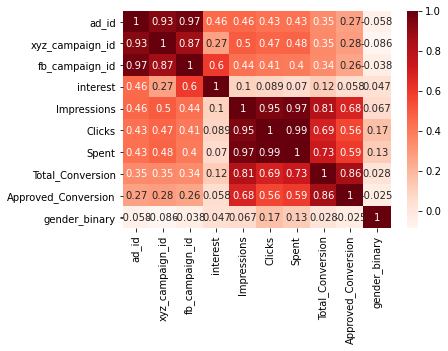

In [61]:
corr=data.corr()
sns.heatmap(corr,annot= True,cmap='Reds', 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

#### Observation :
- There is a strong positive correlation between (ad_id,xyz_campaign_id and fb_campaign_id) and (impressions,clicks and spent).
- Interest is not much correlated to any of the attribute.
- There is negative correlation between approved_conversion and ad_id.

In [62]:
corr

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,gender_binary
ad_id,1.000000,0.929892,0.972002,0.456483,0.462308,0.431981,0.433053,0.346539,0.271331,-0.058324
xyz_campaign_id,0.929892,1.000000,0.872392,0.272282,0.495273,0.469729,0.476689,0.346684,0.284968,-0.086118
fb_campaign_id,0.972002,0.872392,1.000000,0.595753,0.439439,0.406978,0.403532,0.344170,0.257658,-0.038037
interest,0.456483,0.272282,0.595753,1.000000,0.101973,0.088706,0.070226,0.120270,0.058353,0.047230
Impressions,0.462308,0.495273,0.439439,0.101973,1.000000,0.948514,0.970386,0.812838,0.684249,0.067059
Clicks,0.431981,0.469729,0.406978,0.088706,0.948514,1.000000,0.992906,0.694632,0.559526,0.168725
Spent,0.433053,0.476689,0.403532,0.070226,0.970386,0.992906,1.000000,0.725379,0.593178,0.125022
Total_Conversion,0.346539,0.346684,0.344170,0.120270,0.812838,0.694632,0.725379,1.000000,0.864034,0.027559
Approved_Conversion,0.271331,0.284968,0.257658,0.058353,0.684249,0.559526,0.593178,0.864034,1.000000,-0.025350
gender_binary,-0.058324,-0.086118,-0.038037,0.047230,0.067059,0.168725,0.125022,0.027559,-0.025350,1.000000


### Calculating CTR, CPC and CVR

In [63]:
# Calcutate click-through-rate and 
#  (CTR = ((Clicks / impr) * 100), 
data["CTR %"] = ((data["Clicks"] / data["Impressions"]) * 100)

In [64]:
#Cost-per-click
#   CPC = Spent / Clicks)
data["CPC"] = data["Spent"] / data["Clicks"]

In [65]:
#Conversion Rate - CVR %
data["CVR %"] = data["Total_Conversion"] / data["Impressions"]

In [66]:
data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,gender_binary,CTR %,CPC,CVR %
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0,0.013605,1.43,0.000272
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0,0.011198,0.91,0.000112
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0,0.000000,NaN,0.001443
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0,0.023480,1.25,0.000235
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0,0.024195,1.29,0.000242


<AxesSubplot:>

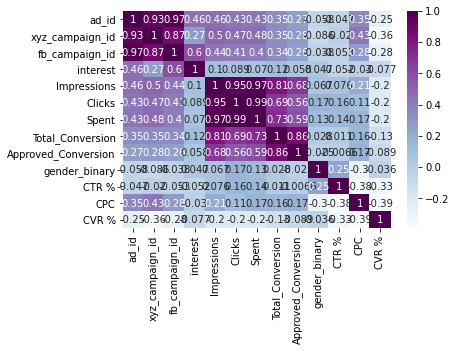

In [67]:
#correlation after adding new columns
corr = data.corr()

# plot the heatmap
sns.heatmap(corr,annot= True,cmap='BuPu', 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [68]:
data.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,gender_binary,CTR %,CPC,CVR %
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,936.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007,0.482065,0.016420,1.499347,0.000253
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708,0.499897,0.011506,0.232879,0.000712
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.180000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000,0.000000,0.010022,1.390000,0.000012
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000,0.000000,0.015981,1.498273,0.000031
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000,1.000000,0.023364,1.644364,0.000169
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000,1.000000,0.105932,2.212000,0.011494


## Univariate Analysis

(array([518.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 625.]),
 array([ 916. ,  942.2,  968.4,  994.6, 1020.8, 1047. , 1073.2, 1099.4,
        1125.6, 1151.8, 1178. ]),
 <BarContainer object of 10 artists>)

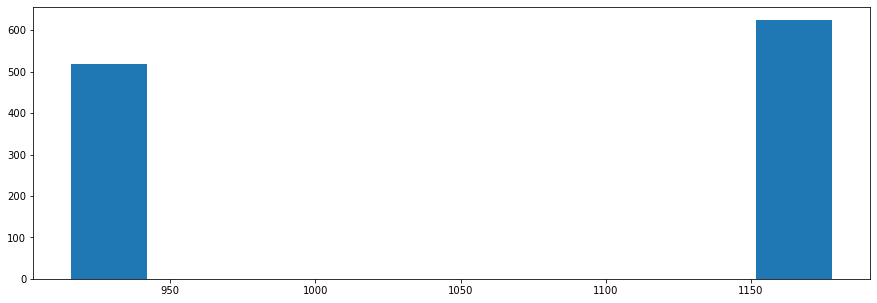

In [69]:
plt.figure(figsize=(15,5))

plt.hist(data['xyz_campaign_id'])

C:\Users\pooja\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'PDF - interest'}, xlabel='interest', ylabel='Density'>

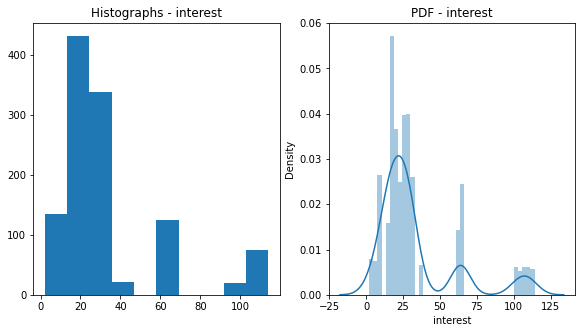

In [70]:
#interest

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title("Histographs - interest")
plt.hist(df['interest'])

plt.subplot(1,3,2)
plt.title("PDF - interest")
sns.distplot(df['interest'],hist=True, rug=False)

#### Observations :

- There are many people who get the ads of their interest and few people get undesirable ads.

C:\Users\pooja\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'PDF - Clicks'}, xlabel='Clicks', ylabel='Density'>

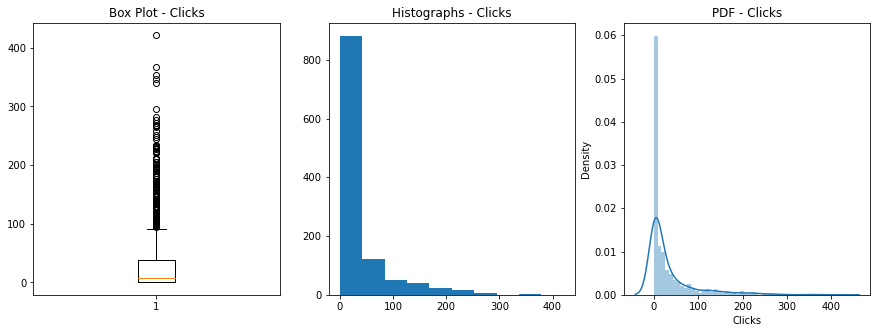

In [71]:
#Clicks

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title("Box Plot - Clicks")
plt.boxplot(df['Clicks'])

plt.subplot(1,3,2)
plt.title("Histographs - Clicks")
plt.hist(df['Clicks'])

plt.subplot(1,3,3)
plt.title("PDF - Clicks")
sns.distplot(df['Clicks'],hist=True, rug=False)

#### Observations :

- A very few people are there who clicks a lot, others do only 1-2 click.

C:\Users\pooja\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'PDF - Total_Conversion'}, xlabel='Total_Conversion', ylabel='Density'>

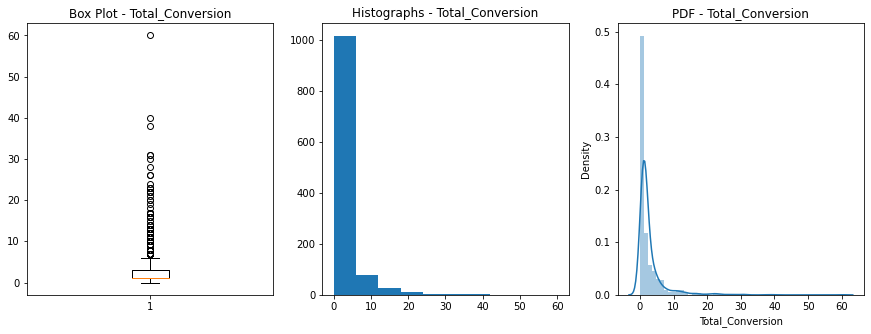

In [72]:
#Total_Conversion

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title("Box Plot - Total_Conversion")
plt.boxplot(df['Total_Conversion'])

plt.subplot(1,3,2)
plt.title("Histographs - Total_Conversion")
plt.hist(df['Total_Conversion'])

plt.subplot(1,3,3)
plt.title("PDF - Total_Conversion")
sns.distplot(df['Total_Conversion'],hist=True, rug=False)

#### Observations :

- Almost everyone who get desirable ads, enquired about the product but a very few number of people are there who gets desirable ads but not enquired about the product.

C:\Users\pooja\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'PDF - Approved_Conversion'}, xlabel='Approved_Conversion', ylabel='Density'>

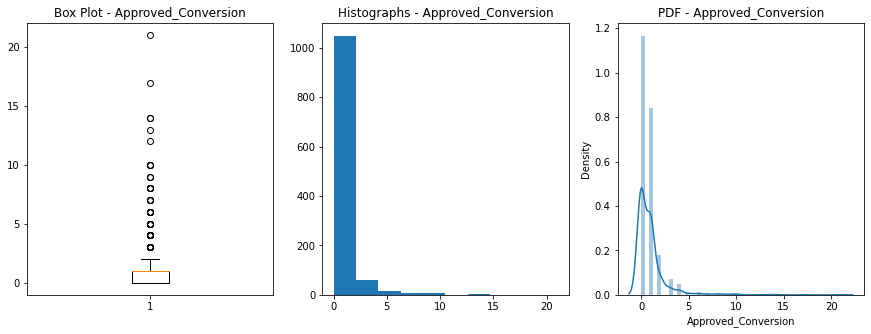

In [73]:
#Approved_Conversion

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title("Box Plot - Approved_Conversion")
plt.boxplot(df['Approved_Conversion'])

plt.subplot(1,3,2)
plt.title("Histographs - Approved_Conversion")
plt.hist(df['Approved_Conversion'])

plt.subplot(1,3,3)
plt.title("PDF - Approved_Conversion")
sns.distplot(df['Approved_Conversion'],hist=True, rug=False)

## Bivariate Analysis

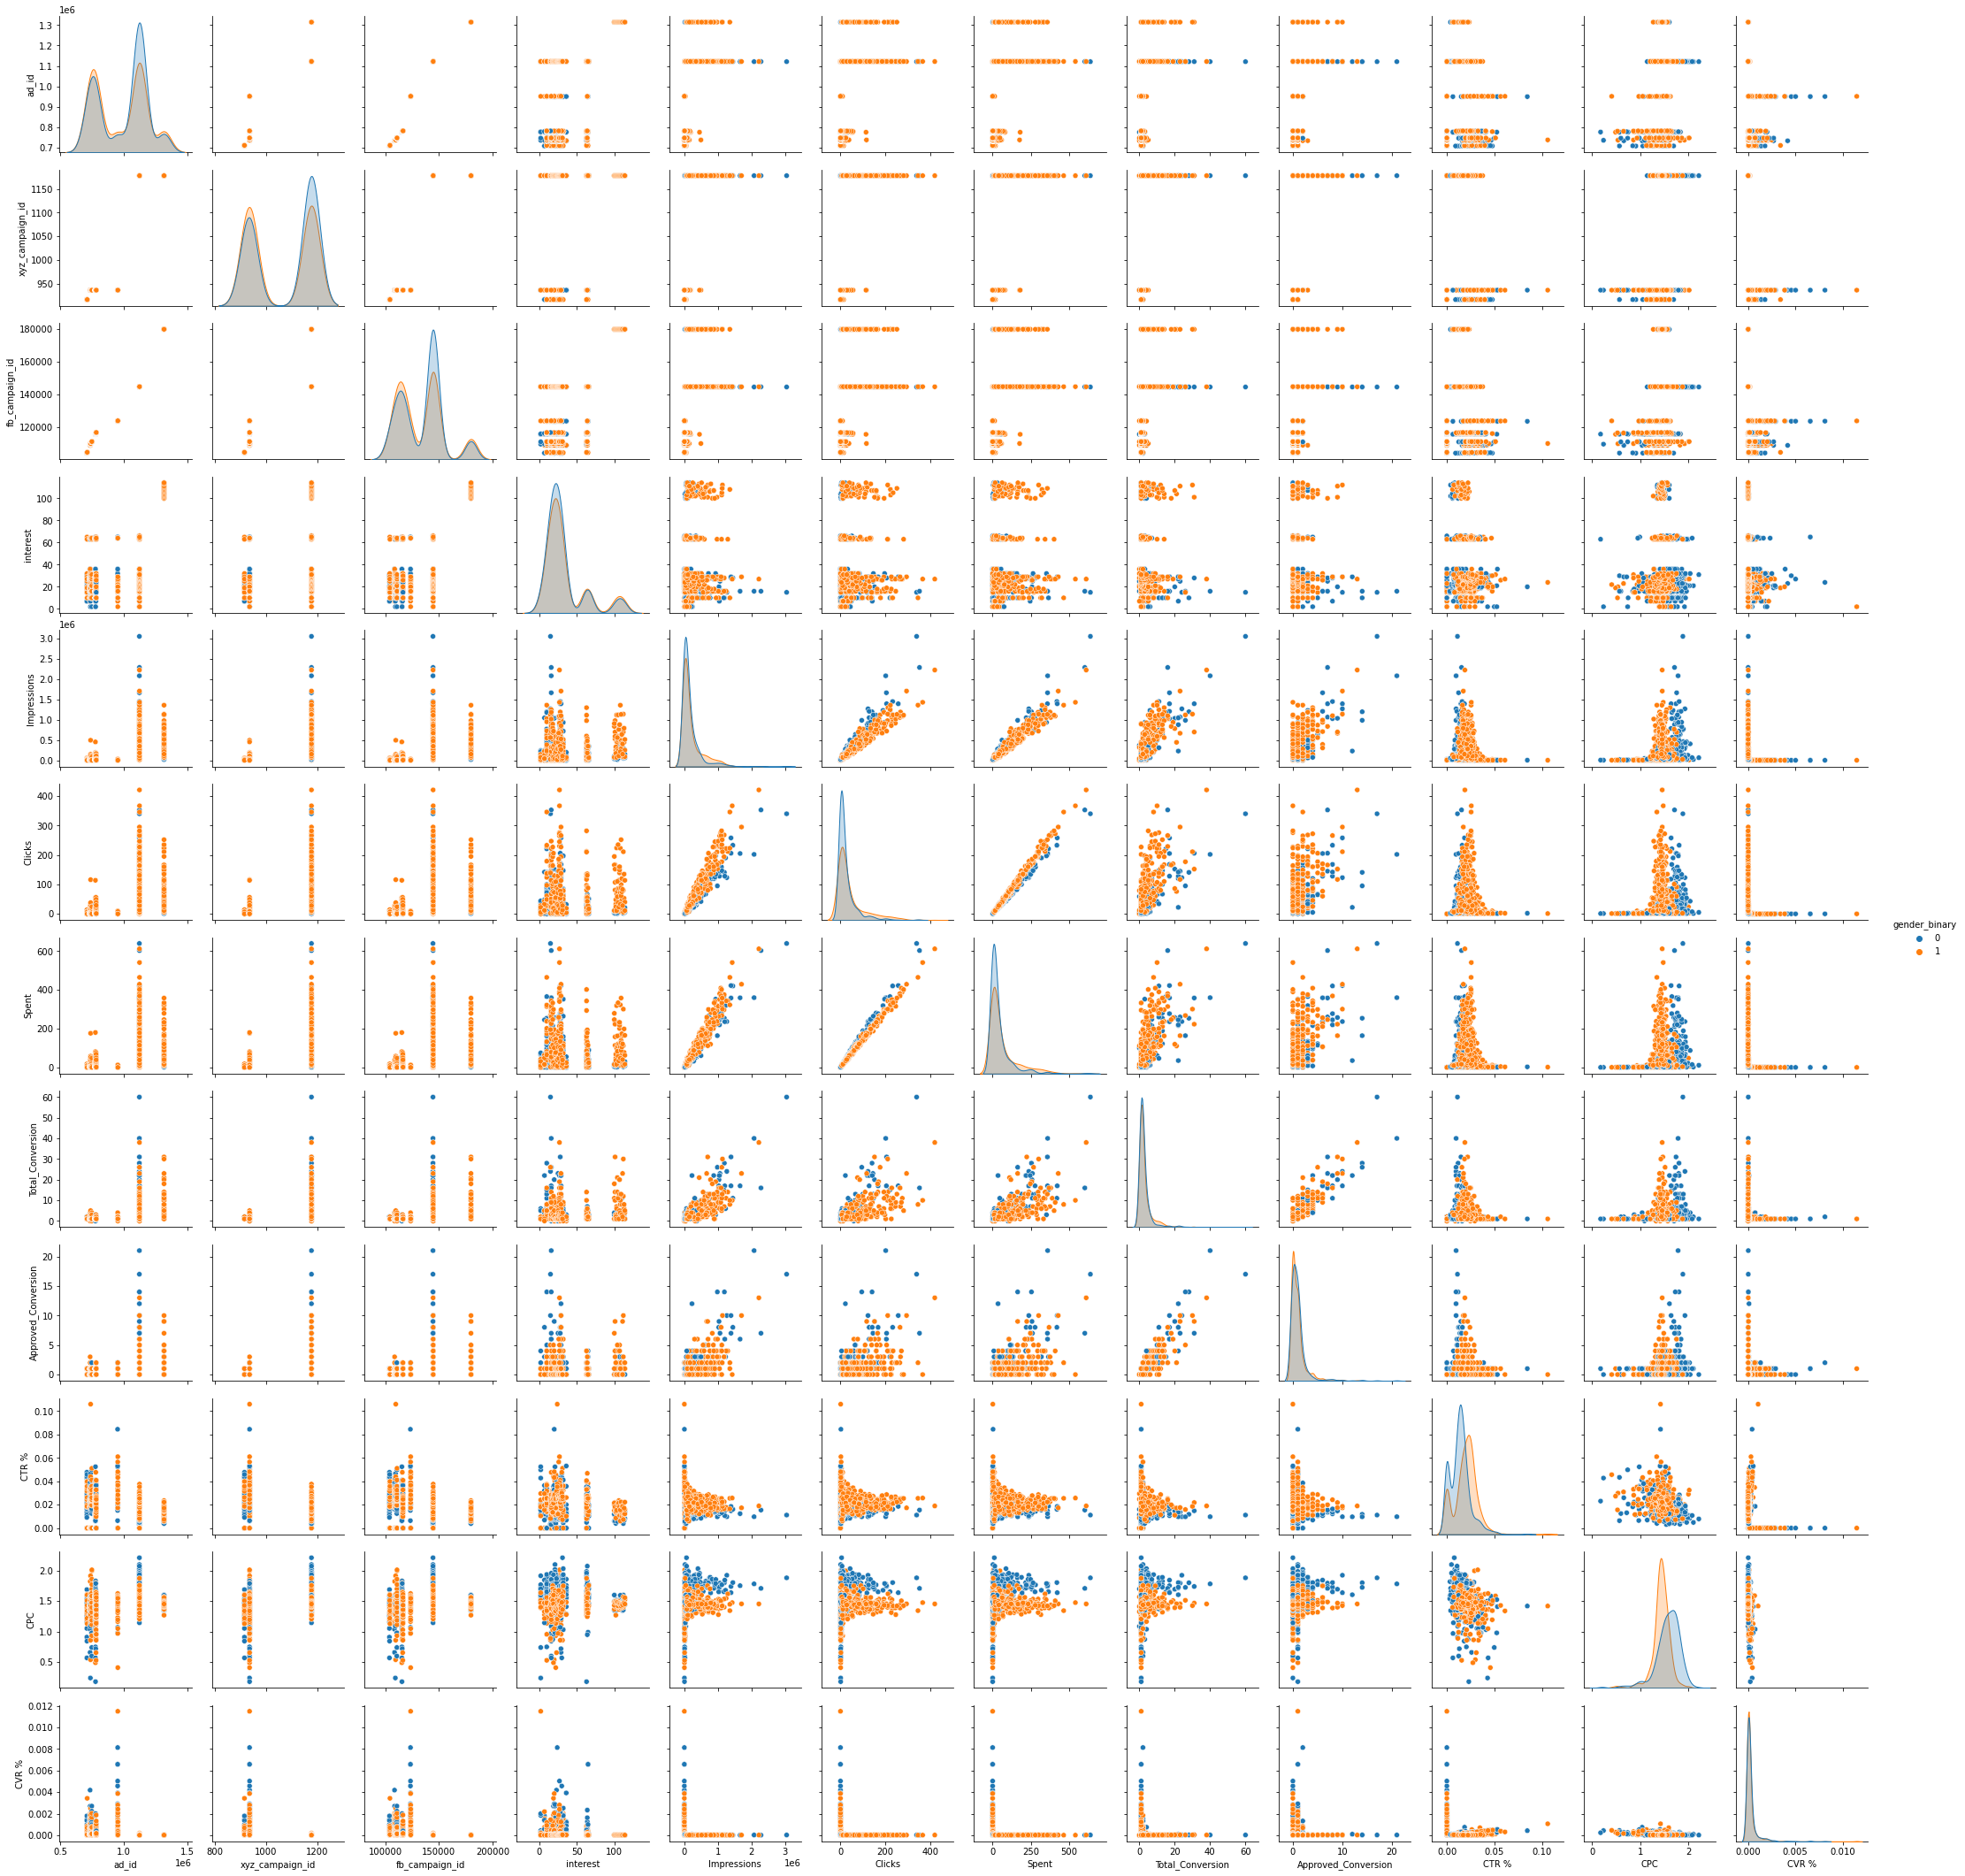

In [74]:
# Pairplot

sns.pairplot(data=data , hue = 'gender_binary')

#### Observations :

- There is a strong positive correlation between (ad_id,xyz_campaign_id and fb_campaign_id) and (impressions,clicks and spent).
- Interest is not much correlated to any of the attribute.
- There is negative correlation between approved_conversion and ad_id.
- There is no significant relation of any attribute with CTC, CTR and CVR.

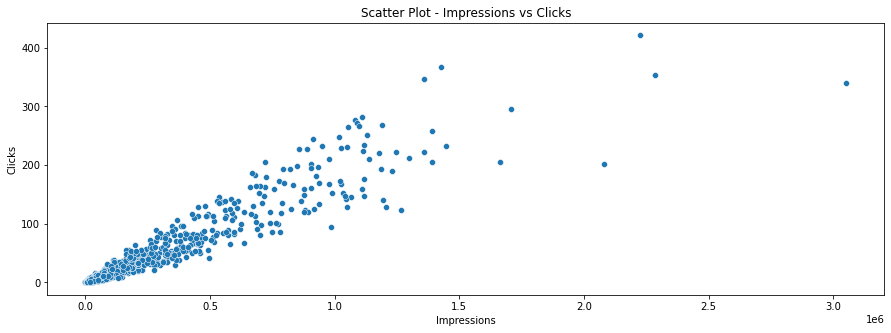

In [75]:
# Scatter Plot - Impressions vs Clicks
plt.figure(figsize=(15,5))
plt.title("Scatter Plot - Impressions vs Clicks")
sns.scatterplot(x = df['Impressions'], y = df['Clicks'])
plt.show()

#### Observations :

- There is a positive linear correlation between Impressions and Clicks. That means, more the ad exposure, more users will click and hence more conversions.

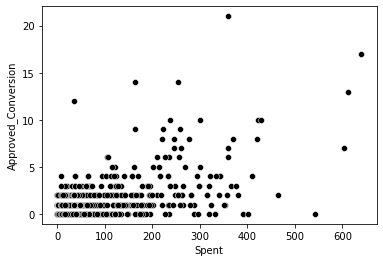

In [78]:
# Hexbin Plot

sns.scatterplot(x='Spent', y='Approved_Conversion', data=df, color='k')
plt.show()

#### Observations : 

- Conversions are not dependent on the amount spent by the company to the facebook. Conversions are dependent on the interest of the consumers.

************* Thank You *************